In [1]:
# load necessary libraries for processing and I/O
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the Iris dataset from seaborn's built-in datasets
iris = sns.load_dataset('iris')

In [3]:
# see first 10 rows of iris dataset
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
# summary statistics of numerical data in iris dataset 
# 25%, 50%, and 75% refer to the 25th, 50th, and 75th percentiles respectively
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Step 3: Statistical Hypothesis Testing
# 3.1 T-Test
# Filter data for the two species
setosa_sepal_length = iris[iris['species'] == 'setosa']['sepal_length']
versicolor_sepal_length = iris[iris['species'] == 'versicolor']['sepal_length']

In [9]:
t_stat, p_value = stats.ttest_ind(setosa_sepal_length, versicolor_sepal_length)
print(f"T-Test between Setosa and Versicolor Sepal Lengths:\nT-Statistic: {t_stat}, P-Value: {p_value}")

T-Test between Setosa and Versicolor Sepal Lengths:
T-Statistic: -10.52098626754911, P-Value: 8.985235037487079e-18


As we can see from the above t-test, the sepal lengths of setosa and versicolor are statistically significantly different from one another at a significance level of 0.05 (p value is 0.00000000000000000895, so much lower than 5). As an excercise, test if the petal lengths are also significantly different from one another

In [11]:
# Step 4: Correlation Analysis
# 4.1 Pearson Correlation
# Calculate Pearson correlation
pearson_corr, p_value = stats.pearsonr(iris['sepal_length'], iris['petal_length'])
print(f"Pearson Correlation between Sepal Length and Petal Length:\nCorrelation Coefficient: {pearson_corr}, P-Value: {p_value}")


Pearson Correlation between Sepal Length and Petal Length:
Correlation Coefficient: 0.8717537758865831, P-Value: 1.0386674194498827e-47


The sepal length and petal lengths are highly correlated, with a low p-value, meaning that it is unlikely that it is due to chance

In [12]:
# 4.2 Spearman Correlation
# Calculate Spearman correlation
spearman_corr, p_value = stats.spearmanr(iris['sepal_length'], iris['petal_length'])
print(f"Spearman Correlation between Sepal Length and Petal Length:\nCorrelation Coefficient: {spearman_corr}, P-Value: {p_value}")


Spearman Correlation between Sepal Length and Petal Length:
Correlation Coefficient: 0.881898126434986, P-Value: 3.4430872780470036e-50


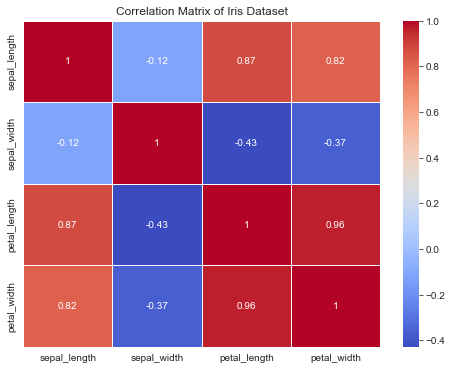

In [15]:
corr_matrix = iris.drop(['species'], axis=1).corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

It is often useful to identify correlations between the numeric fields in a dataset and to visualize it as a heatmap. Notice that all columns are perfectly correlated with themselves. We excluded the species column since it is non-numerical. As an excercise, research the [Phi-k correlation](https://phik.readthedocs.io/en/latest/) and use it to analyze the correlations between the columns in the iris dataset